In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
sns.set_theme(font_scale=1.5)


from Materials import Material, Concrete, Steel
from Sections import Rectangular, Section, HollowRectangular, HollowCircular

In [65]:
frp = Material('FRP', 600e6, 80e9, 'black')
conf_steel = Steel('Confining Steel', 190e9, 355e6, 'blue')
reinf_steel = Steel('Reinforcing Steel', 190e9, 500e6, 'black')
concrete = Concrete('Concrete', 37e9, 50e6, 'gray',None,conf_steel, 0.707878495, 2.5) # TODO

# test_section = HollowRectangular(concrete, 0.600, 0.600,0.2,0.2,0.20)

# test_outer_steel = HollowCircular(conf_steel, 0.508, 0.0125, 0.254, 0.254)
# test_concrete = HollowCircular(concrete, 0.483, 0.105, 0.254, 0.254)
# test_inner_steel = HollowCircular(conf_steel, 0.273, 0.0063, 0.254, 0.254)

# test_section = test_outer_steel+test_concrete+ test_inner_steel
title = '300x300_Original_Max_Mz_moments_z'


test_outer_steel = HollowCircular(conf_steel, 0.3556, 0.0088, 0.1778, 0.1778)
test_concrete = HollowCircular(concrete, 0.338, 0.04675, 0.1778, 0.1778)
test_inner_steel = HollowCircular(conf_steel, 0.2445, 0.0063, 0.1778, 0.1778)

# test_section = Rectangular(concrete, 0.3, 0.3) 
# test_section.add_reinforcements(reinf_steel, 0.032, [(0.058,0.058) , (0.242,0.058) , (0.058,0.242) , (0.242,0.242)])


# test_section.add_reinforcements(reinf_steel, 0.032, [(0.075,0.075) , (0.525,0.075) , (0.075,0.525) , (0.525,0.525) , (0.225,0.075) , (0.075,0.225) , (0.525,0.225) , (0.225,0.525) , (0.375,0.075) , (0.075,0.375) , (0.375,0.525) , (0.525,0.375)
#        ])

# test_section = HollowRectangular(concrete, 0.600, 0.600,0.28,0.28,0.16)
# test_section.add_reinforcements(reinf_steel, 0.032, [(0.058,0.058) , (0.542,0.058) , (0.058,0.542) , (0.542,0.542) , (0.219333333333333,0.058) , (0.058,0.219333333333333) , (0.542,0.219333333333333) , (0.219333333333333,0.542) , (0.380666666666667,0.058) , (0.058,0.380666666666667) , (0.380666666666667,0.542) , (0.542,0.380666666666667)
# ]) 

# test_section = Rectangular(concrete, 0.600, 0.600)

# test_outer_steel = HollowRectangular(outer_confining_steel, 0.14, 0.26, 0.1274, 0.2474, 0.0063, 0, 0)
# test_concrete = Rectangular(concrete, 0.1274, 0.2474, 0.0063, 0.0063)
test_section = test_outer_steel + test_concrete + test_inner_steel



In [83]:
test_section.generate_slices()
# test_section.slices.reinf_steel_area.sum()
test_section.confinement_and_second_order_effect (4.6, 4e4, 29130, -14390 )# TODO
test_section.calculate_neutral_axis( 4e4, 0.0088) # TODO
print("Neutral axis:", test_section.neutral_axis)
test_section.slices.to_csv("output.csv")
test_section.slices



0.0 0.3556
Neutral axis: 0.15593641658570329


,height,mid_height,concrete_area,reinf_steel_area,conf_steel_area,strain,concrete_stress,reinf_steel_stress,conf_steel_stress,concrete_force,reinf_steel_force,conf_steel_force,total_force,total_moment
0,0.0005,0.00025,0.0,0.0,8.768078e-06,0.003494,3.333333e+07,0,355000000.0,0.0,0,3112.667602,3112.667602,552.654133
1,0.0010,0.00075,0.0,0.0,1.618531e-05,0.003483,3.333333e+07,0,355000000.0,0.0,0,5745.783698,5745.783698,1017.291004
2,0.0015,0.00125,0.0,0.0,2.097147e-05,0.003472,3.333333e+07,0,355000000.0,0.0,0,7444.871687,7444.871687,1314.392096
3,0.0020,0.00175,0.0,0.0,2.482855e-05,0.003461,3.333333e+07,0,355000000.0,0.0,0,8814.135005,8814.135005,1551.728468
4,0.0025,0.00225,0.0,0.0,2.815293e-05,0.003449,3.333333e+07,0,355000000.0,0.0,0,9994.291404,9994.291404,1754.497856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.3540,0.35375,0.0,0.0,2.553029e-05,-0.004440,0.000000e+00,0,-355000000.0,0.0,0,-9063.253481,-9063.253481,1594.679450
708,0.3545,0.35425,0.0,0.0,2.179608e-05,-0.004451,0.000000e+00,0,-355000000.0,0.0,0,-7737.607259,-7737.607259,1365.300801
709,0.3550,0.35475,0.0,0.0,1.725815e-05,-0.004462,0.000000e+00,0,-355000000.0,0.0,0,-6126.644533,-6126.644533,1084.109750
710,0.3555,0.35525,0.0,0.0,1.080602e-05,-0.004474,0.000000e+00,0,-355000000.0,0.0,0,-3836.136866,-3836.136866,680.722487


In [84]:
print(test_section.second_moments_of_area)
print(f"Characteristic force plastic: {test_section.characteristic_force_plastic:.2f}[N]")
print(f"Design Force Plastic: {(test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength):.2f} [N]")

if test_section.conf_steel is not None:
    print(f"Relative Slenderness: {test_section.relative_slenderness:.2f}[-]")
    print(f"Ratio of buckling and applied load, if less than 10 2nd order effect needs to be considered: {test_section.elastic_buckling_load_to_applied_ratio:.2f}[-]")
    print(f"e/d: {test_section.eccentricity_depth:.2f}[-]")
    print(f"eta_a: {test_section.confined_factor_h_a:.2f}[-]")
    print(f"eta_c: {test_section.confined_factor_h_c:.2f}[-]")
    print(f"eta_c: {test_section.confined_factor_h_c:.2f}[-]")
    print(f"Second Order Moment Unconfined: {test_section.second_order_moment:.2f}[Nm]")
    print(f"First Order Moment Unconfined - modified: {test_section.first_order_moment_modified:.2f}[Nm]")
    print(f"Design Moment Unconfined (including 2nd order): {test_section.second_order_effect_design_moment_M_ed:.2f}[Nm]")
else:
    print(f"Slenderness Unconfined: {test_section.slenderness_unconf:.2f}[-]")
    print(f"Limit Slenderness Unconfined: {test_section.slenderness_limit_unconf:.2f}[-]")
    print(f"Factor_a: {test_section.factor_a:.2f}[-]")
    print(f"Second Order Moment Unconfined: {test_section.second_order_moment:.2f}[Nm]")
    print(f"First Order Moment Unconfined: {test_section.first_order_moment_modified :.2f}[Nm]")
    print(f"Design Moment Unconfined (including 2ndorder): {test_section.second_order_effect_design_moment_M_ed:.2f}[Nm]")



#     print(test_section.deflection_e_2)


    
    



{Concrete: {'Ixx': 0.00046520364823457254, 'Iyy': 0.00046520364823457287, 'Ixy': 6.376459615300439e-20}, Confining Steel: {'Ixx': 0.0001776734753408838, 'Iyy': 0.0001776734753408843, 'Ixy': 8.568488238565962e-21}}
Characteristic force plastic: 7215665.81[N]
Design Force Plastic: 6502773.18 [N]
Relative Slenderness: 0.63[-]
Ratio of buckling and applied load, if less than 10 2nd order effect needs to be considered: 402.20[-]
e/d: 2.05[-]
eta_a: 1.00[-]
eta_c: 0.00[-]
eta_c: 0.00[-]
Second Order Moment Unconfined: 613.33[Nm]
First Order Moment Unconfined - modified: 29130.00[Nm]
Design Moment Unconfined (including 2nd order): 29743.33[Nm]


In [85]:
# print(f"Sum Moment: {test_section.slices.total_moment.sum():.2f} Nm")
# print(f"Sum Concrete Area: {test_section.slices.concrete_area.sum():.6f} m^2")
# print(f"Sum Reinforceing Steel Area: {test_section.slices.reinf_steel_area.sum():.6f} m^2")
# print(f"Sum Confining Steel Area: {test_section.slices.conf_steel_area.sum():.6f} m^2")
# print(f"Sum Force: {test_section.slices.total_force.sum():.2f} Nm")
# print(f"Total Force: {test_section.slices.total_force.sum():.2f} Nm")
# print(f"Ratio of reinforcement area to concrete area(ρs): {(test_section.slices.reinf_steel_area.sum())  / test_section.slices.concrete_area.sum():.4f} -")
# # For reinforced sections
# print(f"Maximum Design Plastic Resistance (Axial Force): {(test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength):.2f} N")
# print(f"Characteristic Plastic Resistance (Axial Force): {(test_section.slices.concrete_area.sum() * concrete.characteristic_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength):.2f} N")

# pd.DataFrame.from_dict({
#     "Total Concrete Area [m2]": test_section.slices.concrete_area.sum(),
#     "Total Reinforceing Steel Area [m2]": test_section.slices.reinf_steel_area.sum(),
#     "Total Confining Steel Area [m2]": test_section.slices.reinf_steel_area.sum(),
#     "Ratio of reinforcement area to concrete area (ρs)": (test_section.slices.reinf_steel_area.sum()  / test_section.slices.concrete_area.sum()),
#     "Sum moment": test_section.slices.total_moment.sum()}, orient='index')

if test_section.conf_steel is not None:
    table = pd.DataFrame.from_dict({
    "Total Concrete Area [m2]": test_section.slices.concrete_area.sum(),
    "Total Reinforceing Steel Area [m2]": test_section.slices.reinf_steel_area.sum(),
    "Total Confining Steel Area [m2]": test_section.slices.conf_steel_area.sum(),
    "Neutral axis [m]": test_section.neutral_axis,
    "Ratio of reinforcement area to concrete area (ρs)": (test_section.slices.reinf_steel_area.sum()  / test_section.slices.concrete_area.sum()),
    "Sum moment": test_section.slices.total_moment.sum(),
    "Characteristic force plastic [N]": test_section.characteristic_force_plastic,
    "Design Force Plastic [N]": (test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength),
    "Relative Slenderness [-]": test_section.relative_slenderness,
    "Ratio of buckling and applied load, , [-] if less than 10 2nd order effect needs to be considered": test_section.elastic_buckling_load_to_applied_ratio,
    "e/d": test_section.eccentricity_depth,
    "eta_a": test_section.confined_factor_h_a,
    "eta_c": test_section.confined_factor_h_c,
    "Second Order Moment confined [Nm]": test_section.second_order_moment,
    "First Order Moment confined - modified [Nm]": test_section.first_order_moment_modified,
    "Design Moment confined (including 2nd order) [Nm]": test_section.second_order_effect_design_moment_M_ed
    }, orient='index', columns=[title+" Properties"])
    
else:
    table = pd.DataFrame.from_dict({ 
    "Total Concrete Area [m2]": test_section.slices.concrete_area.sum(),
    "Total Reinforceing Steel Area [m2]": test_section.slices.reinf_steel_area.sum(),
    "Total Confining Steel Area [m2]": test_section.slices.conf_steel_area.sum(),
    "Neutral axis [m]": test_section.neutral_axis,
    "Ratio of reinforcement area to concrete area (ρs)": (test_section.slices.reinf_steel_area.sum()  / test_section.slices.concrete_area.sum()),
    "Sum moment [Nm]": test_section.slices.total_moment.sum(),
    "Characteristic force plastic [N]": test_section.characteristic_force_plastic,
    "Design Force Plastic [N]": (test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength),
    "Slenderness Unconfined [-]": test_section.slenderness_unconf,
    "Factor_a": test_section.factor_a,
    "Limit Slenderness Unconfined [-]": test_section.slenderness_limit_unconf,
    "Second Order Moment Unconfined [Nm]": test_section.second_order_moment,
    "First Order Moment Unconfined [Nm]": test_section.first_order_moment_modified,
    "Design Moment Unconfined (including 2ndorder) [Nm]": test_section.second_order_effect_design_moment_M_ed
    }, orient='index', columns=[title+" Properties"])
    
table

,300x300_Original_Max_Mz_moments_z Properties
Total Concrete Area [m2],4.277356e-02
Total Reinforceing Steel Area [m2],0.000000e+00
Total Confining Steel Area [m2],1.430137e-02
Neutral axis [m],1.559364e-01
Ratio of reinforcement area to concrete area (ρs),0.000000e+00
Sum moment,5.313832e+05
Characteristic force plastic [N],7.215666e+06
Design Force Plastic [N],6.502773e+06
Relative Slenderness [-],6.279097e-01
"Ratio of buckling and applied load, , [-] if less than 10 2nd order effect needs to be considered",4.021956e+02


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


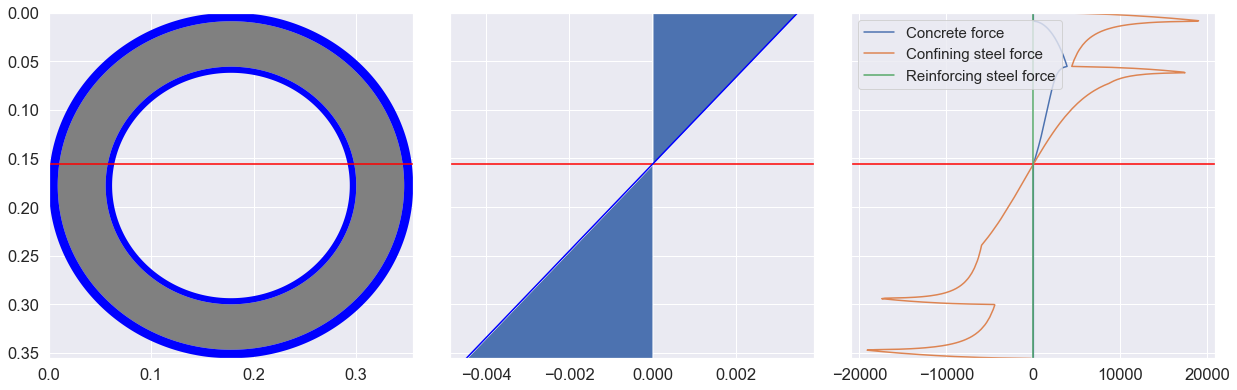

In [86]:

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.125    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

fig, axs = plt.subplots(1, 3, sharey=True, squeeze=True, figsize=(18, 6))
# sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})   


                       
axs[0].invert_yaxis()
axs[0].set_ylim(0,test_section.height)
axs[0].set_xlim(0,test_section.height)
axs[0].invert_yaxis()

slices = test_section.slices
test_section.plot(axs[0])

for ax in axs:
    ax.axhline(test_section.neutral_axis, color='red')

axs[1].plot(
    slices.strain,
    slices.mid_height,
    color='blue'
    
)

axs[1].fill_betweenx(
    slices.mid_height,0,slices.strain,
    
)


axs[2].plot(
    slices.concrete_force,
    slices.mid_height,
    label = "Concrete force"
)

axs[2].plot(
    slices.conf_steel_force,
    slices.mid_height,
    label = "Confining steel force"
)

axs[2].plot(
    slices.reinf_steel_force,
    slices.mid_height,
    label = "Reinforcing steel force"
)
axs[2].legend(fontsize=15)

    


# axs[3].plot(
#     slices.total_moment,
#     slices.mid_height,
#     label = "Total Moment"

# )
# axs[3].legend()

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)
# [ax.set_aspect('equal') for ax in axs.ravel()]

# sns.set(font_scale = 1)

plt.savefig(title+"_section.svg", format="svg")

In [87]:
test_section.generate_slices()
design_force = (test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength)
     
axial_loads = np.arange(0, (design_force+100e3), 200e3)
out = []
for axial_load in axial_loads:
    test_section.calculate_neutral_axis(axial_load, 0.0088) # TODO
    total_moment = test_section.slices.total_moment.sum()
    print(axial_load, total_moment)
    out.append({'axial_load': axial_load, 'total_moment': total_moment})
interaction_table = pd.DataFrame(out)
interaction_table

0.0 0.3556
0.0 530788.8772193542
200000.0 533010.2393147915
400000.0 533333.558434619
600000.0 531705.3422222219
800000.0 528042.9903167646
1000000.0 522124.1813524307
1200000.0 513800.1550328425
1400000.0 504346.9043699659
1600000.0 493724.5950837679
1800000.0 481713.49763036554
2000000.0 467875.3913770613
2200000.0 451691.70743408863
2400000.0 434960.431091884
2600000.0 418044.4994984878
2800000.0 400923.0202212205
3000000.0 383571.4574697373
3200000.0 365959.3582896304
3400000.0 348049.2927547217
3600000.0 329792.12439856486
3800000.0 311117.42495090363
4000000.0 291908.98113564367
4200000.0 272094.95368149393
4400000.0 251648.17533213747
4600000.0 230593.467481138
4800000.0 209132.66395287428
5000000.0 187341.86086957494
5200000.0 165165.37420147087
5400000.0 142531.40970233007
5600000.0 119343.50918772494
5800000.0 95467.29093259037
6000000.0 70699.71349959576
6200000.0 44693.22844827996
6400000.0 16565.152146549604
6600000.0 0.09981038921978325


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -7.188111562907545e+41 reached.
  warnings.warn(msg, RuntimeWarning)


,axial_load,total_moment
0,0.0,530788.877219
1,200000.0,533010.239315
2,400000.0,533333.558435
3,600000.0,531705.342222
4,800000.0,528042.990317
5,1000000.0,522124.181352
6,1200000.0,513800.155033
7,1400000.0,504346.904370
8,1600000.0,493724.595084
9,1800000.0,481713.497630


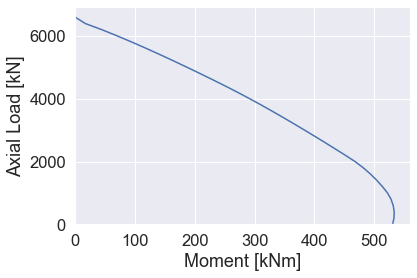

In [88]:
#interaction_table['axial_load_kn'] = interaction_table.axial_load / 1e3
interaction_table_kn = interaction_table / 1e3
g = sns.lineplot(
    data = interaction_table_kn,
    y = 'axial_load',
    x = 'total_moment',
    sort=False
)
g.set_xlabel("Moment [kNm]")
g.set_ylabel("Axial Load [kN]")
g.set_ylim([0, None])
g.set_xlim([0, None])
plt.savefig(title+"_N_M.svg", format="svg")

In [90]:
design_moment = (test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength)
print (design_moment)


6502773.183184259
